In [10]:
import sys
import os
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from typing import List


PROJECT_ROOT = os.path.abspath(os.path.join(os.path.abspath('../..'),os.pardir))
sys.path.append(PROJECT_ROOT)

from electronTransportCode.MCEstimator import TrackEndEstimator
%matplotlib widget

In [11]:
particleTracerK = pickle.load(open('data/particleTracerK.pkl', 'rb'))
particleTracerKD = pickle.load(open('data/particleTracerKD.pkl', 'rb'))
eSource, NB_PARTICLES, dsArray = pickle.load(open('data/simargv.pkl', 'rb'))
nbSim = dsArray.size

In [12]:
print(eSource, NB_PARTICLES, dsArray)

5.0 1999998 [0.01       0.01994737 0.03978974 0.07937005 0.15832235 0.31581138
 0.62996052 1.25660531 2.50659661 5.        ]


In [13]:
# Load all simulation results from data/
TrackEndEstimatorK: TrackEndEstimator = pickle.load(open('data/TrackEndEstimatorK.pkl', 'rb'))[0]

TEKDList: List[TrackEndEstimator] = []
TEKDSList: List[TrackEndEstimator] = []
for i in range(nbSim):
    TEKDList.append(pickle.load(open(f'data/TrackEndEstimatorKD{i}.pkl', 'rb'))[0])
    TEKDSList.append(pickle.load(open(f'data/TrackEndEstimatorKDS{i}.pkl', 'rb'))[0])


In [31]:
# Compute wasserstein distance
bins = 200
kCenter, kData = TrackEndEstimatorK.getDensityData(bins=bins)

Wass = np.empty((nbSim, 2), dtype=float)
for i in range(nbSim):
    _, kdData = TEKDList[i].getDensityData(bins=bins)
    _, kdsData = TEKDSList[i].getDensityData(bins=bins)
    # Wass[i, 0] = np.linalg.norm(kData-kdData)
    # Wass[i, 1] = np.linalg.norm(kData-kdsData)
    Wass[i, 0] = stats.wasserstein_distance(kData, kdData)
    Wass[i, 1] = stats.wasserstein_distance(kData, kdsData)


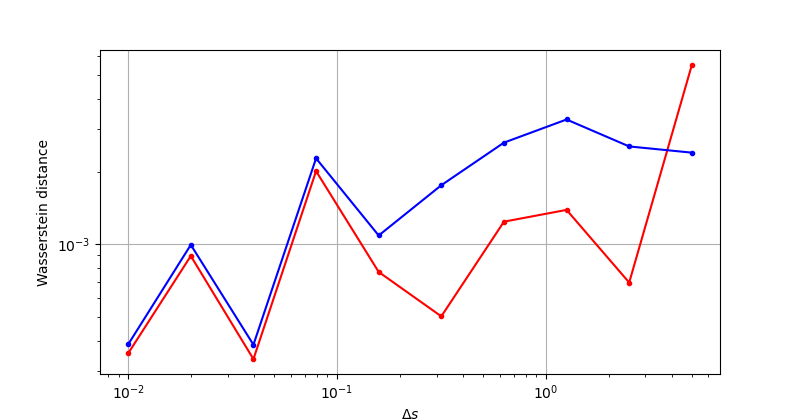

In [32]:
# Plotting
fig, ax1 = plt.subplots(1, 1, figsize=(8, 4.2))

ax1.loglog(dsArray, Wass[:, 0], '.-r', label='KDMC')
ax1.loglog(dsArray, Wass[:, 1], '.-b', label= 'KDSMC')
ax1.set_xlabel('$\Delta s$')
ax1.set_ylabel('Wasserstein distance')
ax1.grid()

Text(0, 0.5, 'Density')

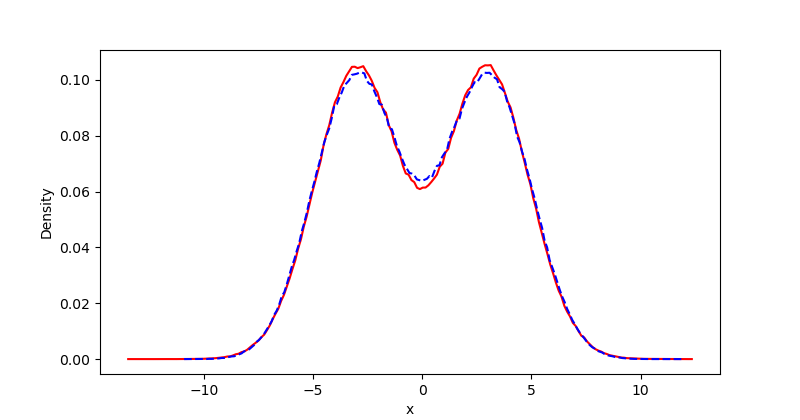

In [24]:
kd1Center, kd1Data = TEKDList[-1].getDensityData(bins=bins)

fig, ax1 = plt.subplots(1, 1, figsize=(8, 4.2))

ax1.plot(kd1Center, kd1Data, 'r', label='KDMC')
ax1.plot(kCenter, kData, '--b', label= 'Analog')
ax1.set_xlabel('x')
ax1.set_ylabel('Density')

In [17]:
TEKDList[-1].scoreMatrix.size

1999998

In [25]:
help(np.linalg.norm)

Help on function norm in module numpy.linalg:

norm(x, ord=None, axis=None, keepdims=False)
    Matrix or vector norm.
    
    This function is able to return one of eight different matrix norms,
    or one of an infinite number of vector norms (described below), depending
    on the value of the ``ord`` parameter.
    
    Parameters
    ----------
    x : array_like
        Input array.  If `axis` is None, `x` must be 1-D or 2-D, unless `ord`
        is None. If both `axis` and `ord` are None, the 2-norm of
        ``x.ravel`` will be returned.
    ord : {non-zero int, inf, -inf, 'fro', 'nuc'}, optional
        Order of the norm (see table under ``Notes``). inf means numpy's
        `inf` object. The default is None.
    axis : {None, int, 2-tuple of ints}, optional.
        If `axis` is an integer, it specifies the axis of `x` along which to
        compute the vector norms.  If `axis` is a 2-tuple, it specifies the
        axes that hold 2-D matrices, and the matrix norms of these